In [171]:
!pip install pandas numpy scipy matplotlib scikit-learn

In [172]:
import pandas as pd
import numpy as np

In [173]:
data = pd.read_csv('/Users/Joro/Downloads/COMP3212-Computational_Biology/Coursework/data/denseDataOnlyDownload-2.tsv', sep='\t')
print(data.head())

             sample           samples  ENSG00000175899.13  ENSG00000166535.18
0  TCGA-BT-A20W-11A  TCGA-BT-A20W-11A               24.84               13.18
1  TCGA-XF-AAN4-01A  TCGA-XF-AAN4-01A               24.69               16.02
2  TCGA-SY-A9G0-01A  TCGA-SY-A9G0-01A               24.14                7.58
3  TCGA-ZF-AA5P-01A  TCGA-ZF-AA5P-01A               23.83               14.55
4  TCGA-K4-A5RI-11A  TCGA-K4-A5RI-11A               23.79               10.98


In [174]:
print(data.describe())

       ENSG00000175899.13  ENSG00000166535.18
count          430.000000          430.000000
mean            20.176744           14.951260
std              1.505779            3.547472
min             16.270000            0.000000
25%             19.150000           12.482500
50%             20.155000           15.345000
75%             21.092500           17.650000
max             24.840000           22.490000


In [175]:
print(data.isnull().sum())

sample                0
samples               0
ENSG00000175899.13    0
ENSG00000166535.18    0
dtype: int64


In [196]:
data.drop(columns=['samples'], inplace=True)

data.rename(columns={
    'ENSG00000175899.13': 'A2M', 
    'ENSG00000166535.18': 'A2ML1'
}, inplace=True)

print(data.head())

             sample    A2M  A2ML1
0  TCGA-BT-A20W-11A  24.84  13.18
1  TCGA-XF-AAN4-01A  24.69  16.02
2  TCGA-SY-A9G0-01A  24.14   7.58
3  TCGA-ZF-AA5P-01A  23.83  14.55
4  TCGA-K4-A5RI-11A  23.79  10.98


In [177]:
X = data[['A2M', 'A2ML1']]

In [178]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

/Users/Joro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


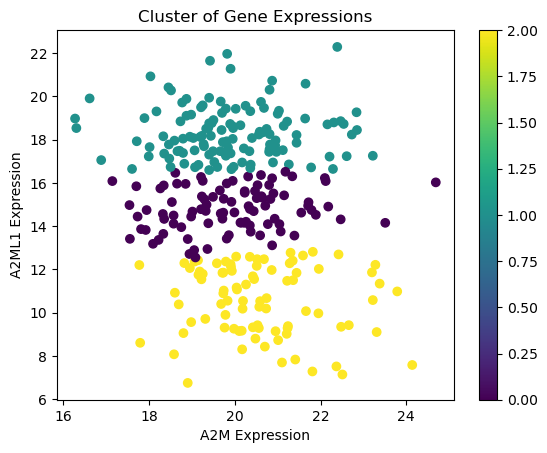

In [197]:
from sklearn.cluster import KMeans

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42) 
clusters = kmeans.fit_predict(X_train)

# Visualizing clusters
import matplotlib.pyplot as plt

plt.scatter(X_train['A2M'], X_train['A2ML1'], c=clusters, cmap='viridis')
plt.xlabel('A2M Expression')
plt.ylabel('A2ML1 Expression')
plt.title('Cluster of Gene Expressions')
plt.colorbar()
plt.show()

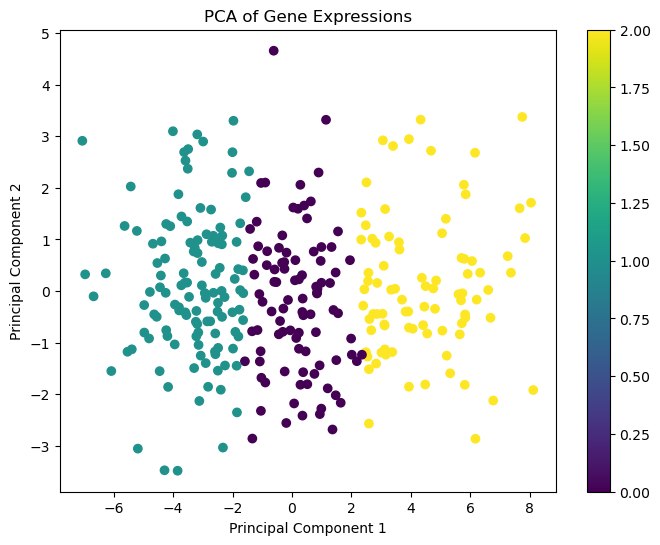

In [198]:
from sklearn.decomposition import PCA

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Gene Expressions')
plt.colorbar()
plt.show()

In [199]:
# Add the cluster labels to the dataframe
X_train_clustered = X_train.copy()
X_train_clustered['cluster'] = clusters

# Calculate the mean expression of each gene in each cluster
mean_expression = X_train_clustered.groupby('cluster').mean()
print(mean_expression)

               A2M      A2ML1
cluster                      
0        19.909247  14.795054
1        19.907107  18.339421
2        20.588276  10.579609


In [202]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_train, clusters)

print(f"The average silhouette score is : {silhouette_avg}")

The average silhouette score is : 0.4038610560945729


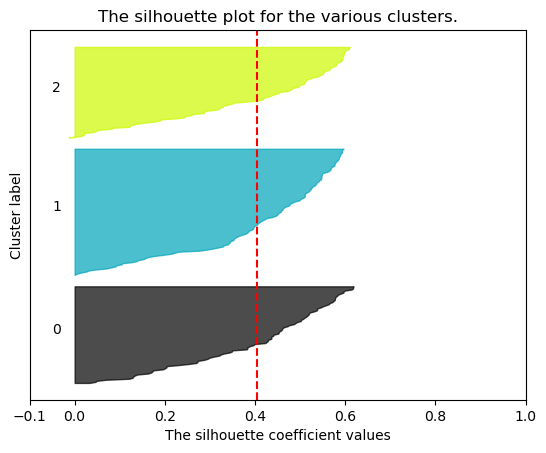

In [203]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Calculate the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_train, clusters)

fig, ax = plt.subplots(1, 1)
y_lower = 10
n_clusters = len(np.unique(clusters))

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10

ax.set_title("The silhouette plot for the various clusters.")
ax.set_xlabel("The silhouette coefficient values")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

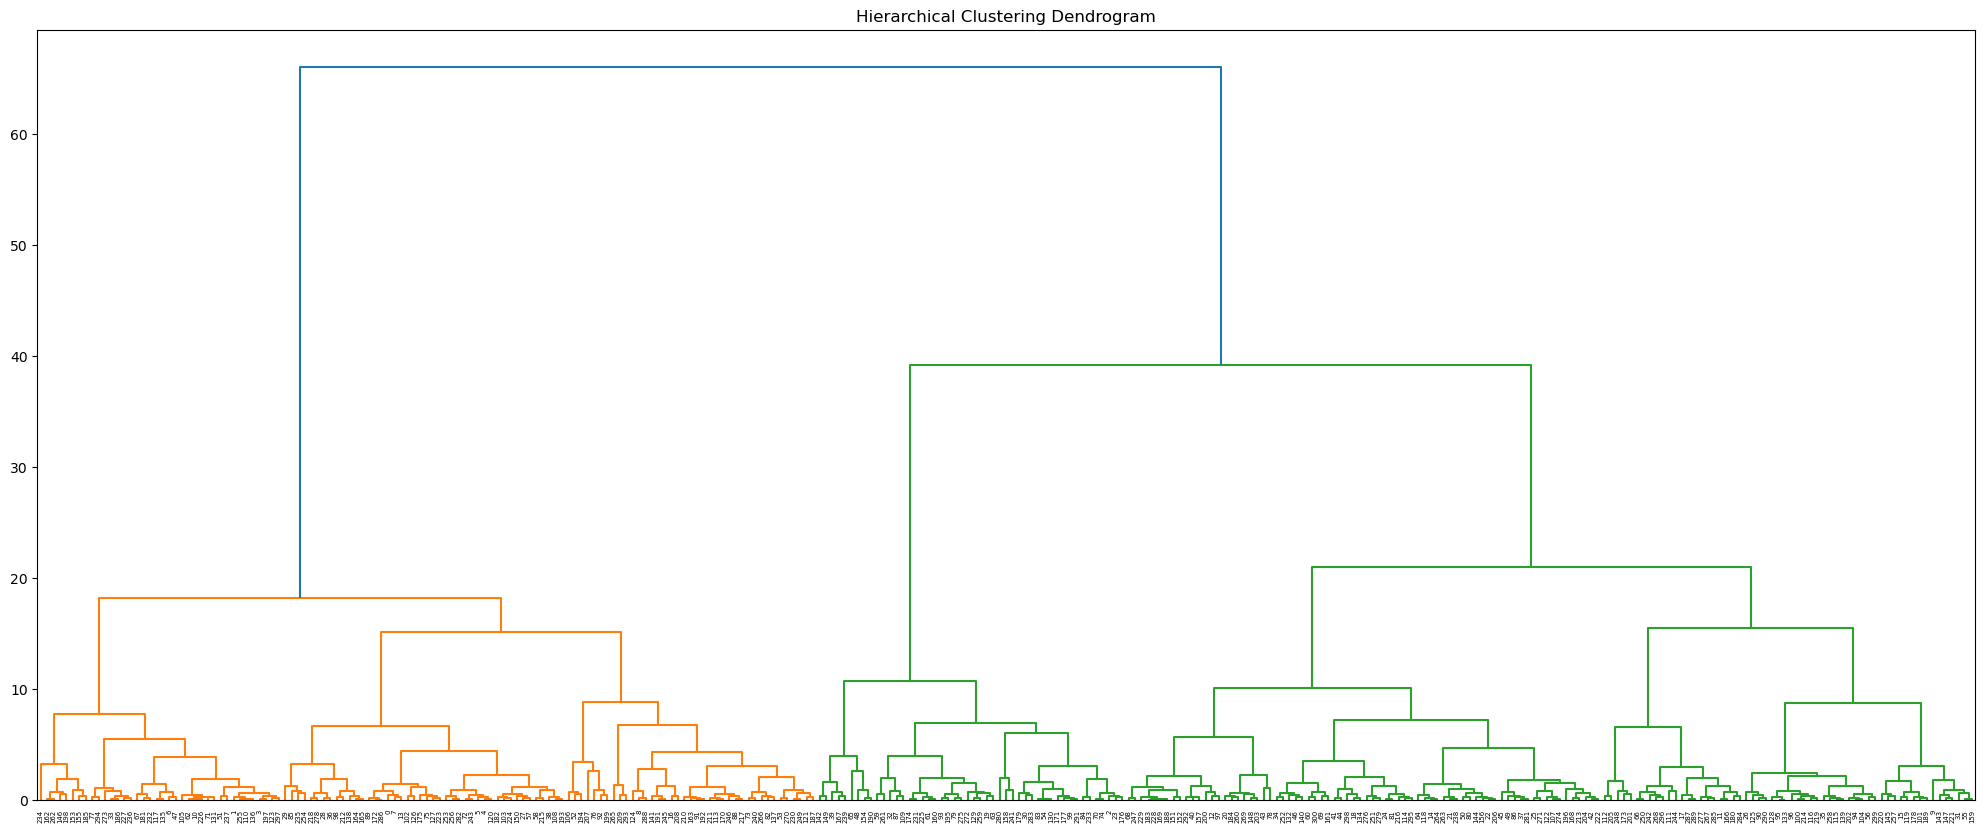

/Users/Joro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 4, 2, 4, 1, 1, 4, 1, 1, 0, 4, 0, 3, 1, 3, 0, 1, 0, 3, 2, 3, 3,
       3, 2, 3, 3, 0, 1, 1, 1, 2, 0, 2, 4, 3, 0, 1, 3, 1, 2, 3, 3, 3, 3,
       3, 3, 3, 4, 2, 3, 3, 4, 1, 1, 2, 0, 0, 1, 1, 2, 3, 2, 4, 2, 3, 2,
       0, 4, 3, 3, 2, 4, 1, 1, 2, 1, 1, 4, 3, 2, 3, 3, 1, 2, 2, 1, 3, 2,
       1, 1, 0, 1, 1, 2, 0, 0, 0, 3, 1, 2, 0, 0, 1, 1, 0, 4, 1, 3, 1, 2,
       4, 0, 0, 1, 3, 0, 0, 4, 3, 0, 1, 1, 3, 4, 1, 0, 1, 1, 0, 2, 2, 4,
       3, 0, 3, 4, 4, 1, 1, 0, 3, 1, 2, 0, 3, 0, 4, 0, 3, 2, 1, 3, 3, 4,
       2, 4, 3, 3, 2, 0, 2, 3, 4, 1, 1, 1, 0, 2, 3, 3, 1, 2, 1, 0, 2, 1,
       2, 2, 0, 2, 0, 4, 1, 3, 3, 4, 4, 1, 3, 0, 2, 1, 1, 1, 1, 2, 3, 4,
       4, 1, 3, 0, 0, 3, 3, 0, 3, 1, 1, 1, 1, 1, 1, 3, 0, 1, 3, 1, 1, 0,
       0, 0, 3, 1, 1, 2, 4, 4, 3, 3, 1, 2, 4, 2, 4, 1, 4, 4, 3, 2, 1, 2,
       0, 1, 0, 1, 1, 3, 0, 1, 0, 3, 3, 1, 1, 4, 1, 0, 0, 2, 3, 2, 4, 3,
       3, 1, 1, 0, 0, 3, 1, 3, 2, 4, 3, 2, 3, 0, 1, 3, 2, 3, 1, 2, 0, 0,
       1, 0, 1, 0, 0, 2, 3, 1, 4, 3, 0, 4, 3, 0, 3]

In [204]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Generate the linkage matrix
Z = linkage(X_train, 'ward')

# Plot the hierarchical clustering as a dendrogram.
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z)
plt.show()

# Apply Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_train)

(301, 2)
eps=0.1, min_samples=3, number of clusters: 2
eps=0.1, min_samples=5, number of clusters: 1
eps=0.1, min_samples=7, number of clusters: 1
eps=0.1, min_samples=9, number of clusters: 1
eps=0.3, min_samples=3, number of clusters: 30
eps=0.3, min_samples=5, number of clusters: 9
eps=0.3, min_samples=7, number of clusters: 1
eps=0.3, min_samples=9, number of clusters: 1
eps=0.5, min_samples=3, number of clusters: 9
eps=0.5, min_samples=5, number of clusters: 9
eps=0.5, min_samples=7, number of clusters: 7
eps=0.5, min_samples=9, number of clusters: 5
eps=0.7, min_samples=3, number of clusters: 5
eps=0.7, min_samples=5, number of clusters: 2
eps=0.7, min_samples=7, number of clusters: 3
eps=0.7, min_samples=9, number of clusters: 5
eps=0.9, min_samples=3, number of clusters: 4
eps=0.9, min_samples=5, number of clusters: 4
eps=0.9, min_samples=7, number of clusters: 2
eps=0.9, min_samples=9, number of clusters: 2


Text(0, 0.5, 'Feature 1')

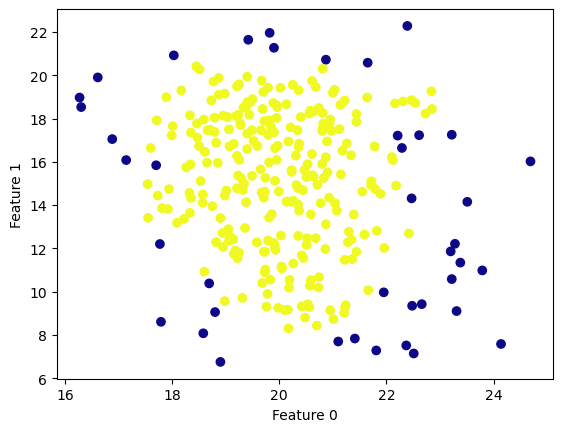

In [205]:
from sklearn.cluster import DBSCAN

print(X_train.shape)

# Convert X_train to a numpy array
X_train_np = X_train.to_numpy()

for eps in [0.1, 0.3, 0.5, 0.7, 0.9]:
    for min_samples in [3, 5, 7, 9]:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        db_clusters = db.fit_predict(X_train_np)
        print(f"eps={eps}, min_samples={min_samples}, number of clusters: {len(np.unique(db_clusters))}")

if X_train_np.shape[1] == 1:
    plt.scatter(X_train_np[:, 0], db_clusters, cmap="plasma")
else:
    plt.scatter(X_train_np[:, 0], X_train_np[:, 1], c=db_clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [206]:
from scipy.stats import ttest_ind

X_train_clustered = X_train.copy()
X_train_clustered['cluster'] = clusters

# Perform a t-test for each gene
p_values = []
for gene in X_train.columns:
    group1 = X_train_clustered[X_train_clustered['cluster'] == 0][gene]
    group2 = X_train_clustered[X_train_clustered['cluster'] == 1][gene]
    t_stat, p_val = ttest_ind(group1, group2)
    p_values.append(p_val)

from statsmodels.stats.multitest import multipletests
reject, pvals_corrected, _, _ = multipletests(p_values, method='fdr_bh')

# Print the names of the differentially expressed genes
differentially_expressed_genes = X_train.columns[reject]
print(differentially_expressed_genes)

Index(['A2ML1'], dtype='object')


In [208]:
from scipy.stats import ttest_ind

X_train_clustered = X_train.copy()
X_train_clustered['cluster'] = clusters

# Perform a t-test for each gene
p_values = []
for gene in X_train.columns:
    group1 = X_train_clustered[X_train_clustered['cluster'] == 0][gene]
    group2 = X_train_clustered[X_train_clustered['cluster'] == 1][gene]
    t_stat, p_val = ttest_ind(group1, group2)
    p_values.append(p_val)

from statsmodels.stats.multitest import multipletests
reject, pvals_corrected, _, _ = multipletests(p_values, method='fdr_bh')

# Print the names of the differentially expressed genes
differentially_expressed_genes = X_train.columns[reject]

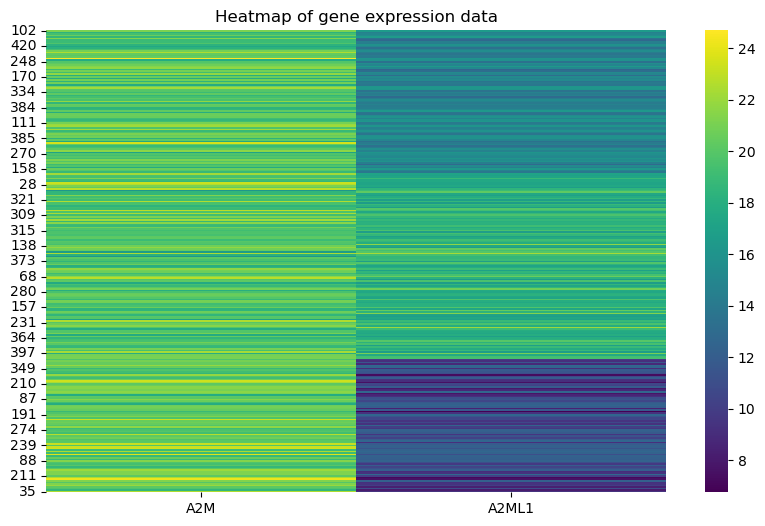

In [209]:
import seaborn as sns

# Sort the data by cluster labels
X_train_sorted = X_train_clustered.sort_values(by='cluster')

# Drop the 'cluster' column for the heatmap
X_train_sorted_dropped = X_train_sorted.drop('cluster', axis=1)
import seaborn as sns

# Sort the data by cluster labels
X_train_sorted = X_train_clustered.sort_values(by='cluster')

# Drop the 'cluster' column for the heatmap
X_train_sorted_dropped = X_train_sorted.drop('cluster', axis=1)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(X_train_sorted_dropped, cmap='viridis')
plt.title('Heatmap of gene expression data')
plt.show()

In [210]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, clusters, test_size=0.2, random_state=42)

clf = svm.SVC()
clf.fit(X_train, y_train)

# Predict the test set results
y_pred = clf.predict(X_test)

# Measure model performance
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9836065573770492


In [213]:
from sklearn import tree

# Train a DecisionTreeClassifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Predict the test set results
y_pred = clf.predict(X_test)

# Measure model performance
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [214]:
print(len(X_train))
print(len(clusters))

240
301


In [215]:
from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_train)

# Get the cluster labels
clusters = kmeans.labels_

/Users/Joro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [216]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, clusters)

# Get feature importances
importances = clf.feature_importances_

# Map importances to the corresponding gene names
importances_df = pd.DataFrame({
    'gene': X_train.columns,
    'importance': importances
})

# Sort by importance
importances_df.sort_values(by='importance', ascending=False, inplace=True)

print(importances_df.head())

    gene  importance
1  A2ML1    0.752302
0    A2M    0.247698


In [217]:
from sklearn.model_selection import cross_val_score

clf = tree.DecisionTreeClassifier()

# Perform 5-fold cross-validation
scores = cross_val_score(clf, X_train, clusters, cv=5)

print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

Cross-validation scores: [0.97916667 0.97916667 0.9375     0.95833333 0.97916667]
Average cross-validation score: 0.9666666666666666


In [218]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}

# Create a GridSearchCV object
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2, cv=5)

# Fit the model to the data
grid.fit(X_train, clusters)

# Print the best parameters
print(grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

In [219]:
from sklearn import tree

# Define the parameter grid
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 3, 4, 5, 6]}

# Create a GridSearchCV object
grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, refit=True, verbose=2, cv=5)

# Fit the model to the data
grid.fit(X_train, clusters)

# Print the best parameters
print(grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .....................criterion=gini, max_depth=None; total time=   0.0s
[CV] END .....................criterion=gini, max_depth=None; total time=   0.0s
[CV] END .....................criterion=gini, max_depth=None; total time=   0.0s
[CV] END .....................criterion=gini, max_depth=None; total time=   0.0s
[CV] END .....................criterion=gini, max_depth=None; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini,

In [225]:
from sklearn import tree

# Train the model with the best parameters
clf = tree.DecisionTreeClassifier(**grid.best_params_)
clf.fit(X_train, clusters)

# Predict the labels
y_pred = clf.predict(X_train)

# Generate confusion matrix
print(confusion_matrix(clusters, y_pred))

# Generate classification report
print(classification_report(clusters, y_pred))

[[49  0  0  0  0]
 [ 0 43  0  0  0]
 [ 0  0 48  0  0]
 [ 0  0  0 70  0]
 [ 0  0  0  0 30]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00        30

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [195]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the labels for SVM
y_pred_svm = clf_svm.predict(X_train)

# Generate confusion matrix for SVM
print(confusion_matrix(clusters, y_pred_svm))

# Generate classification report for SVM
print(classification_report(clusters, y_pred_svm))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- A2ML1
Feature names seen at fit time, yet now missing:
- sample


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output
y = label_binarize(clusters, classes=[0, 1, 2]) 
n_classes = y.shape[1]

# Learn to predict each class against the other
y_score = clf_svm.decision_function(X_train)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- A2ML1
Feature names seen at fit time, yet now missing:
- sample


In [ ]:
# Predict the probabilities for Decision Tree
y_score = clf_tree.predict_proba(X_train)

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

NameError: name 'clf_tree' is not defined